In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())
os.listdir()

/zfs/tillers/panicle/lucas/projects/NAM_2020


['2020_NAM_Plot_Plan_DataSheet.fixed.tsv',
 'Meter_weight_blups.tsv',
 'Dry_weight_blups.tsv',
 'DTH_blups.tsv',
 '.ipynb_checkpoints',
 'dictionary_replace.bash',
 'blup_pairplot.png',
 'Biomass_blups.tsv',
 'l_replace.sed',
 'plink.pruned.sXX.txt',
 'addRep.py',
 'herit.broad.out',
 'herit.err',
 'L_dictionary.txt',
 '2020_NAM_Plot_Plan_DataSheet.csv',
 'plink.pruned.fam',
 'subpop_dictionary.txt',
 '2020_NAM_Plot_Plan_DataSheet.fixed.csv',
 'vegetative_heritability.csv',
 'replace.sed',
 'Wet_weight_blups.tsv',
 'heritability.R',
 'blup_heatmap.png',
 'Maturity_blups.tsv',
 'PAM',
 'Height_blups.tsv',
 'NAM_DS.ipynb',
 'herit.out',
 'Stand_count_blups.tsv',
 'QTL',
 'QTL_VEG']

In [3]:
def open_and_clean(phenotype):
    df = pd.read_csv(phenotype + "_blups.tsv", sep="\t")
    df = df.iloc[:,1:]
    df.columns = ["Accession", phenotype]
    return df

In [4]:
def merge_phenotypes(df, phenotype):
    new_df = pd.merge(df, open_and_clean(phenotype), on="Accession")
    return new_df

In [5]:
phenotypes = ["Maturity", "Height", "Biomass", "DTH", "Dry_weight", "Wet_weight"]
df = open_and_clean("Maturity")
for pheno in phenotypes[1:]:
    df = merge_phenotypes(df, pheno)
df.head()

,Accession,Maturity,Height,Biomass,DTH,Dry_weight,Wet_weight
0,12.2_005,2.469033,97.514705,-15930.282161,-0.065289,0.119950,0.240094
1,12.2_006,-0.049439,-8.835503,13902.276401,0.336933,0.035190,0.318982
2,12.2_007,1.529430,81.226613,22349.584215,0.293628,0.310835,0.954642
3,12.2_008,1.468652,-0.817614,-32357.930518,-0.183550,0.097195,0.174791
4,12.2_009,0.011325,-1.822933,-3275.261833,-0.080681,0.070883,0.487802


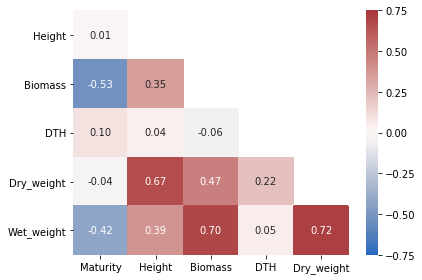

In [12]:
corr = df.corr()
matrix = np.triu(np.ones_like(corr, dtype=np.bool))
matrix = matrix[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
sns.heatmap(corr, annot=True, mask=matrix, fmt=".2f", cmap="vlag", vmin=-0.75, vmax=0.75)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("blup_heatmap.png")

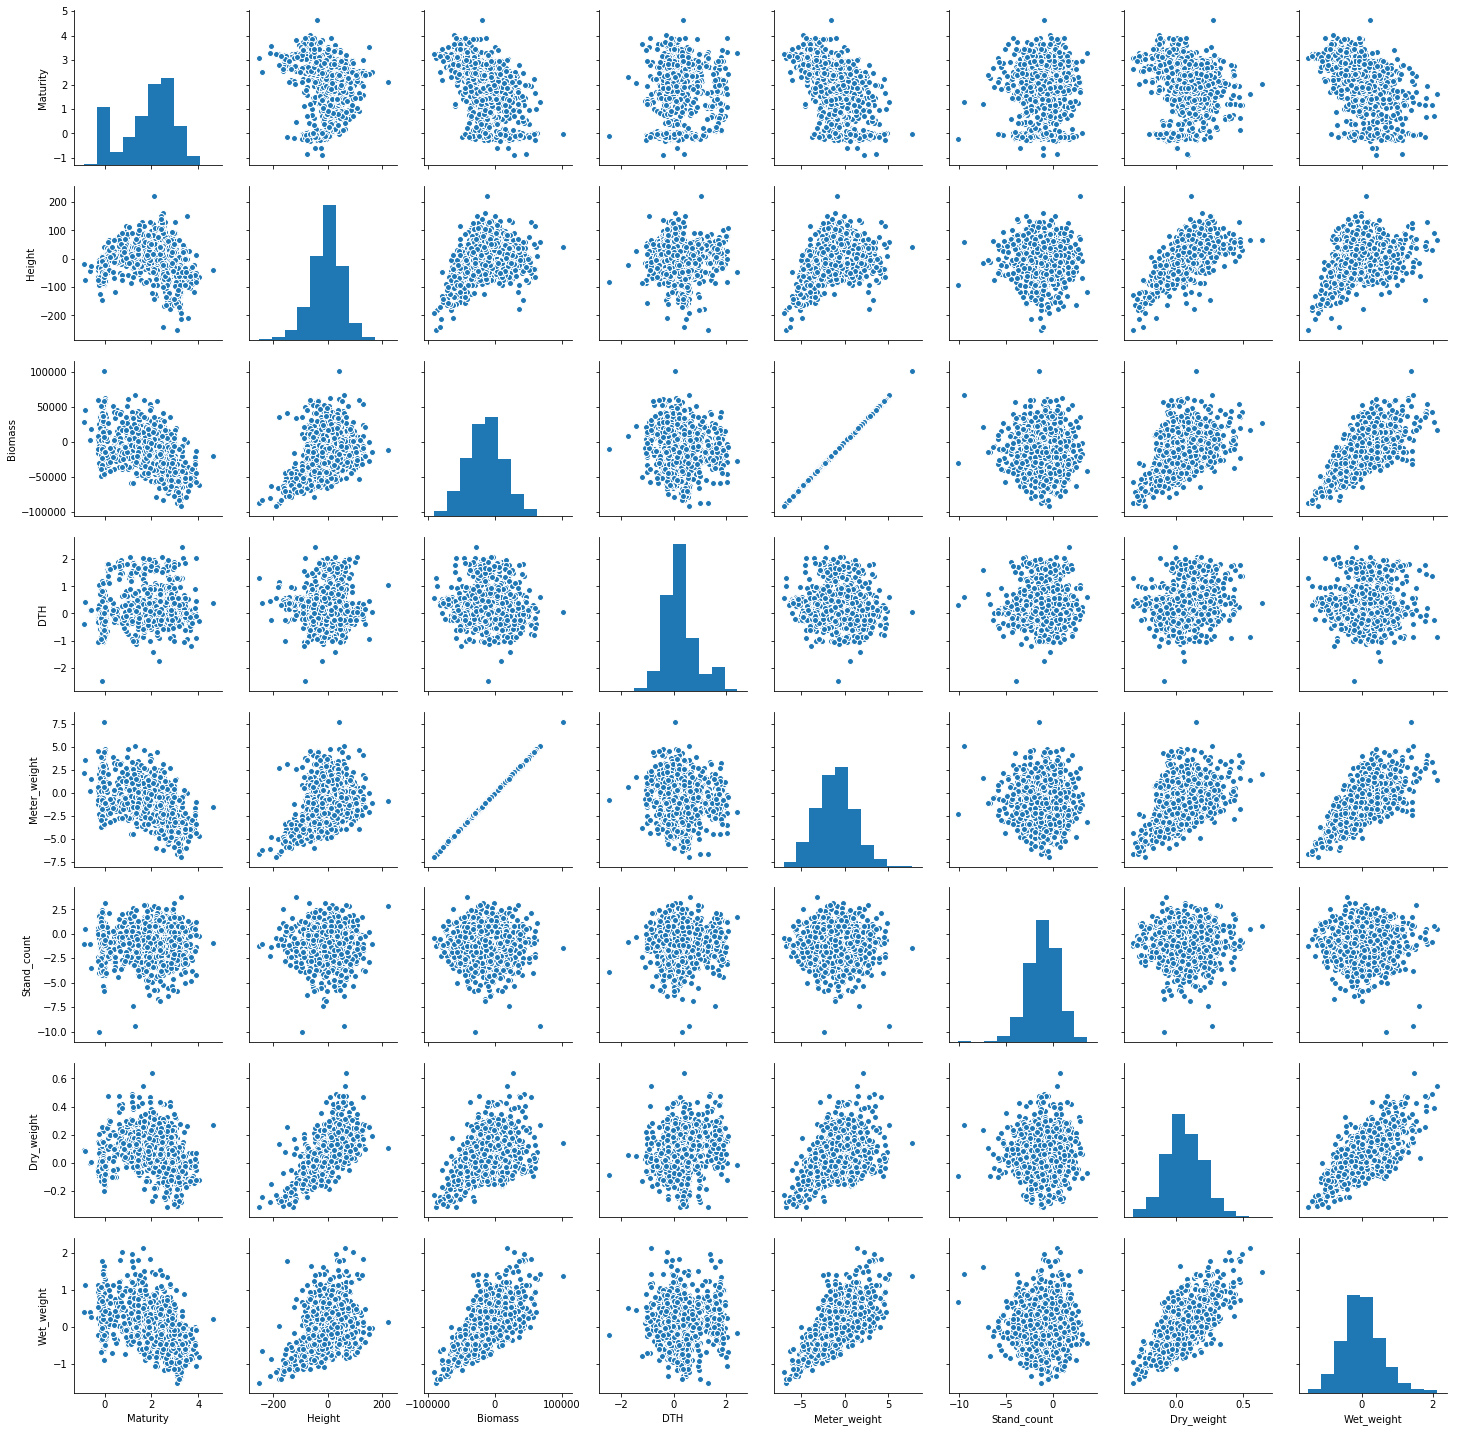

In [31]:
sns.pairplot(df)
plt.savefig("blup_pairplot.png")

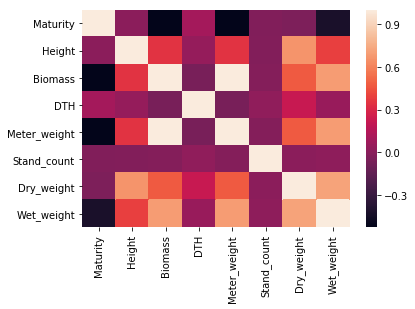

In [28]:
normalized_df = (df.iloc[:,1:] - df.iloc[:,1:].mean())/df.iloc[:,1:].std()
sns.heatmap(normalized_df.corr())

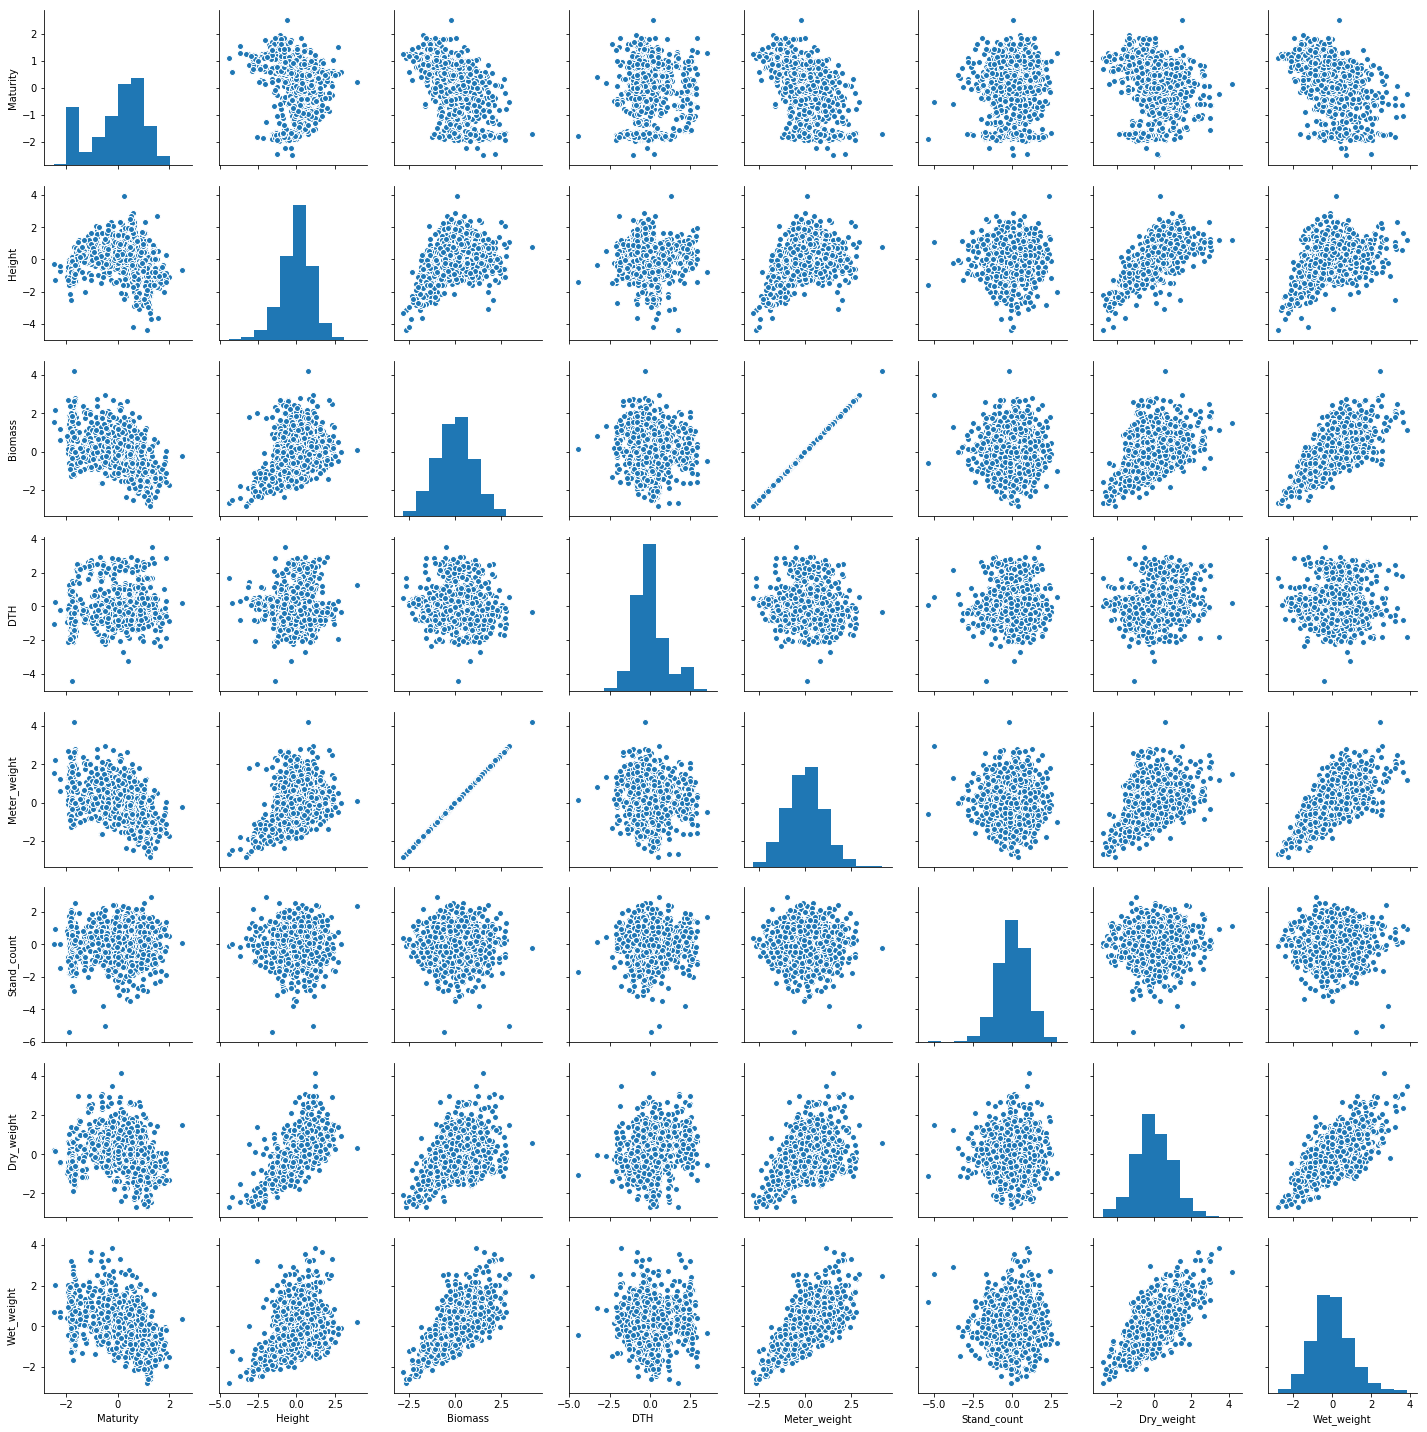

In [29]:
sns.pairplot(normalized_df)